In [1]:
import requests
import datetime
import time
import pandas as pd

In [2]:
cities = {'Miami': '25.775163,-80.208615',
          'Minneapolis': '44.963324,-93.268320',
          'Nashville': '36.171800,-86.785002',
          'Philadelphia': '40.009376,-75.133346',
          'Phoenix': '33.572154,-112.090132'}

apikey = '9227fddfb85ee421066e290587d4bab0'
date = datetime.datetime.now() - datetime.timedelta(days=30)
starttime = time.time()

# Done on 12/21/2015

# data = []

# for k in cities:
#     while date <= datetime.datetime.now():
#         datestring = date.strftime('%Y-%m-%dT%H:%M:%S')
#         r = requests.get('https://api.forecast.io/forecast/{}/{},{}'.format(apikey,cities[k],datestring))
#         maxtemp = (r.json()['daily'])['data'][0]['apparentTemperatureMax']
#         data.append((datestring[:10], k, maxtemp))
#         date += datetime.timedelta(days=1)
#         time.sleep(5.0 - ((time.time() - starttime) % 5.0))
#     date = datetime.datetime.now() - datetime.timedelta(days=30)
#     time.sleep(5.0 - ((time.time() - starttime) % 5.0))

In [16]:
df_starter = pd.DataFrame(data)
df_starter = df_starter.pivot(index=0, columns=1, values=2)
df_starter.head()


1,Miami,Minneapolis,Nashville,Philadelphia,Phoenix
0,,,,,
2015-11-21,86.12,19.74,62.80,53.93,78.46
2015-11-22,84.40,25.48,36.33,51.53,78.52
2015-11-23,77.71,38.99,55.34,34.85,78.30
2015-11-24,76.31,39.21,59.85,47.32,76.30
2015-11-25,77.31,50.92,64.85,52.89,70.23


In [22]:
df = df_starter
df.reset_index(level=0, inplace=True)
df.head()

1,0,Miami,Minneapolis,Nashville,Philadelphia,Phoenix
0,2015-11-21,86.12,19.74,62.80,53.93,78.46
1,2015-11-22,84.40,25.48,36.33,51.53,78.52
2,2015-11-23,77.71,38.99,55.34,34.85,78.30
3,2015-11-24,76.31,39.21,59.85,47.32,76.30
4,2015-11-25,77.31,50.92,64.85,52.89,70.23


In [4]:
# Done on 12/21

# import sqlite3 as lite


# con = lite.connect('weather.db')
# cur = con.cursor()

# with con:
#    cur.execute("DROP TABLE IF EXISTS five_cities;")

# with con:
#    cur.execute("""
#    CREATE TABLE five_cities (
#    weather_date TEXT PRIMARY KEY,
#    miami_maxtemp NUMERIC,
#    minneapolis_maxtemp NUMERIC,
#    nashville_maxtemp NUMERIC,
#    philadelphia_maxtemp NUMERIC,
#    phoenix_maxtemp NUMERIC
#    );""")

In [5]:
# Done on 12/21

# df.to_sql('five_cities', con, if_exists='replace')

In [17]:
df_starter.describe()

,Miami,Minneapolis,Nashville,Philadelphia,Phoenix
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,80.676774,31.462581,59.323226,53.779355,65.846129
std,4.347866,8.646864,9.183640,8.959244,8.356070
min,74.430000,7.550000,34.530000,32.300000,52.720000
25%,77.440000,28.080000,55.315000,51.180000,58.865000
50%,79.430000,32.200000,59.850000,53.610000,65.190000
75%,84.570000,37.850000,64.820000,59.410000,72.565000
max,89.740000,50.920000,72.740000,69.500000,78.520000


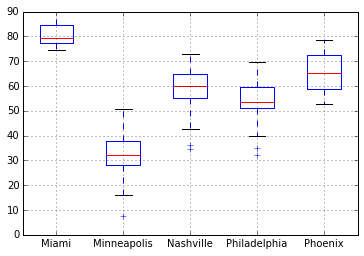

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

df_starter.boxplot(column=list(df_starter), return_type='axes')

In [16]:
import sqlite3 as lite
import pandas as pd


con = lite.connect('weather.db')

df_work = pd.read_sql_query('select * from five_cities;', con)
df_work.columns = ['index','date','miami','minneapolis','nashville','philadelphia','phoenix']
df_work.set_index('date', inplace=True)
df_work.drop('index', axis=1, inplace=True)
df_work

,miami,minneapolis,nashville,philadelphia,phoenix
date,,,,,
2015-11-21,86.12,19.74,62.80,53.93,78.46
2015-11-22,84.40,25.48,36.33,51.53,78.52
2015-11-23,77.71,38.99,55.34,34.85,78.30
2015-11-24,76.31,39.21,59.85,47.32,76.30
2015-11-25,77.31,50.92,64.85,52.89,70.23
2015-11-26,79.49,34.09,71.56,63.26,62.04
2015-11-27,79.43,21.55,68.76,64.98,59.76
2015-11-28,81.04,24.28,64.07,60.76,58.03
2015-11-29,79.55,30.02,59.34,46.55,56.91


In [20]:
df_delta = df_work - df_work.shift()
df_delta.describe()

,miami,minneapolis,nashville,philadelphia,phoenix
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.205333,0.295667,0.025000,-0.026333,-0.591667
std,4.396705,8.181016,9.632977,8.526435,4.205626
min,-14.830000,-16.830000,-26.470000,-19.820000,-8.190000
25%,-1.467500,-3.522500,-4.360000,-3.897500,-2.332500
50%,0.070000,-0.180000,1.330000,1.715000,-0.620000
75%,2.140000,4.945000,4.672500,5.257500,1.270000
max,7.580000,17.820000,19.010000,13.470000,11.690000
